# Dataset Augmentation

## Keras Image Augmentation API

Assim como as demais atividades no Keras, a API de aumento de imagem é simples e poderosa. O Keras fornece a classe ImageDataGenerator() que define a configuração para a preparação e o aumento de dados de imagens. Isso inclui recursos como:

* Padronização de amostragem.
* Padronização em função de recursos.
* Branqueamento ZCA.
* Rotação aleatória, shifts, shear e flips.
* Reordenação de dimensão.


https://keras.io/preprocessing/image/

### Importando bibliotecas

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [2]:
import tensorflow
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt

import os
import shutil

%matplotlib inline



In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Ic" --iversions

Author: Ic

tensorflow: 2.7.0
matplotlib: 3.5.1
sys       : 3.9.7 (default, Sep 16 2021, 13:09:58) 
[GCC 7.5.0]
keras     : 2.7.0
numpy     : 1.21.4



## Exemplos de Técnicas Usadas em Dataset Augmentation

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


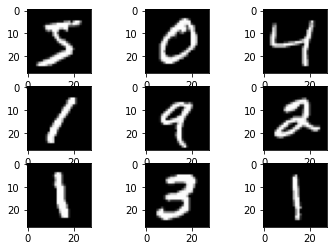

In [5]:
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

In [6]:
K.image_data_format()

'channels_last'

In [7]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)


In [8]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [9]:
def plot_images(X_train, y_train, datagen):
    for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
        for i in range(0, 9):
            plt.subplot(330 + 1 + i)
            plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))

        plt.show()
        break

### Feature Standardization

Também é possível padronizar valores de pixels em todo o conjunto de dados. Isso é chamado de padronização de recursos e reflete o tipo de padronização frequentemente executada para cada coluna em um conjunto de dados tabular.

Você pode executar a padronização de recursos configurando os argumentos featurewise_center e featurewise_std_normalization na classe ImageDataGenerator. Estes são, de fato, definidos como True por padrão e criar uma instância do ImageDataGenerator sem argumentos terá o mesmo efeito.

#### Padronização de imagens em todo o conjunto de dados, mean = 0, stdev = 1

In [10]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

datagen.fit(X_train)

/home/ledragox/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:938: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn(


/home/ledragox/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/numpy_array_iterator.py:129: UserWarning: NumpyArrayIterator is set to use the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3, or 4 channels on axis 3. However, it was passed an array with shape (60000, 1, 28, 28) (28 channels).
  warnings.warn('NumpyArrayIterator is set to use the '


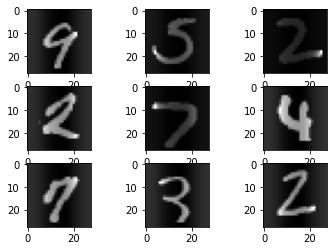

In [11]:
plot_images(X_train,y_train,datagen)

### ZCA Whitening

Uma transformação de branqueamento de uma imagem é uma operação de álgebra linear que reduz a redundância na matriz de imagens de pixel. Menos redundância na imagem destina-se a melhor destacar as estruturas e características da imagem para o algoritmo de aprendizagem.

Normalmente, o branqueamento de imagem é realizado usando a técnica de Análise de Componentes Principais (PCA). Mais recentemente, uma alternativa chamada ZCA (http://ufldl.stanford.edu/wiki/index.php/Whitening) mostra melhores resultados em imagens transformadas que mantêm todas as dimensões originais e, ao contrário do PCA, as imagens transformadas resultantes ainda se parecem com seus originais.

Você pode executar uma transformação ZCA Whitening configurando o argumento zca_whitening como True.

In [12]:
datagen = ImageDataGenerator(zca_whitening=True)

datagen.fit(X_train)

/home/ledragox/anaconda3/lib/python3.9/site-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


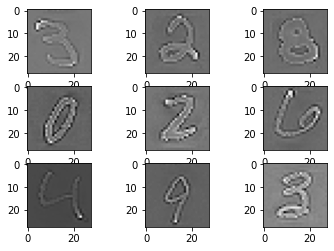

In [13]:
plot_images(X_train,y_train,datagen)

### Random Rotations

Às vezes, as imagens em seus dados de amostra podem ter rotações variadas e diferentes na cena. Você pode treinar seu modelo para melhor manipular rotações de imagens, girando artificial e aleatoriamente imagens de seu conjunto de dados durante o treinamento. O exemplo abaixo cria rotações aleatórias dos dígitos MNIST até 90 graus, definindo o argumento rotation_range.

In [14]:
datagen = ImageDataGenerator(rotation_range=90)

datagen.fit(X_train)

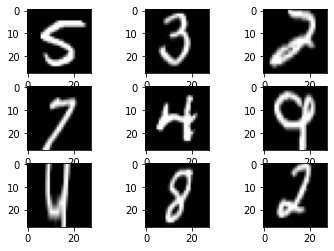

In [15]:
plot_images(X_train,y_train,datagen)

### Random Shifts

Os objetos nas suas imagens podem não estar centrados no frame. Eles podem estar fora do centro de uma variedade de maneiras diferentes.

Você pode treinar sua rede de aprendizado profundo para lidar com objetos fora do centro, criando artificialmente versões deslocadas de seus dados de treinamento. O Keras suporta shift horizontal e vertical de dados de treinamento pelos argumentos width_shift_range e height_shift_range.

In [16]:
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

datagen.fit(X_train)

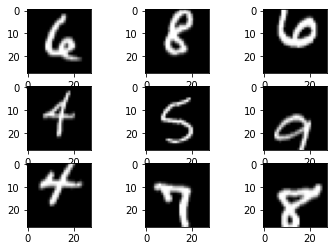

In [17]:
plot_images(X_train,y_train,datagen)

### Random Flips

Outro aumento nos dados de imagem que podem melhorar o desempenho em problemas grandes e complexos é criar random flips de imagens em seus dados de treinamento.

O Keras suporta flipping aleatório ao longo dos eixos vertical e horizontal usando os argumentos vertical_flip e horizontal_flip.

In [18]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)

datagen.fit(X_train)

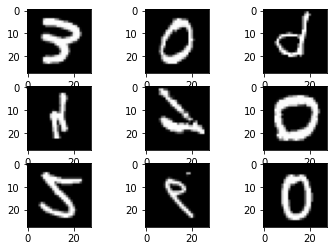

In [19]:
plot_images(X_train,y_train,datagen)

### Salvando Imagens Aumentadas para Arquivo

A preparação e o aumento de dados são realizados apenas just-in time no Keras.

Isso é eficiente em termos de memória, mas pode ser necessário salvar imagens usadas durante o treinamento. Por exemplo, talvez você queira usá-las com um pacote de software diferente mais tarde ou apenas gerá-las uma vez e usá-las em vários modelos ou configurações diferentes de aprendizagem profunda.

O Keras permite que você salve as imagens geradas durante o treinamento. O diretório, o prefixo do nome do arquivo e o tipo de arquivo de imagem podem ser especificados para a função flow() antes do treinamento. Então, durante o treinamento, as imagens geradas serão gravadas no arquivo.



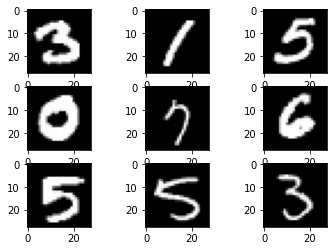

In [20]:
# Save augmented images to file
datagen = ImageDataGenerator()

datagen.fit(X_train)
#shutil.rmtree('images')
os.makedirs('images')
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):

    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
        
        # Salva a imagem em disco (crie o diretório images)
        plt.imsave('images/img'+str(i)+'.png', X_batch[i].reshape(28, 28))

    plt.show()
    break

# Fim